In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/20_3, UAP.csv'
filename_clean = '../csv_detection_info_clean/20_3, UAP.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/3, UAP'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.31933.1.20201105.120612.0.2.17326...,349,514,261,425,1.000000,20,3,"3, UAP"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20200430.152108.0.dcm,1532,1768,2141,2376,0.715096,20,3,"3, UAP"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20200810.125431.0.dcm,1346,1546,1657,1856,0.996722,20,3,"3, UAP"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.270715373.49516.16586.48126.421...,626,799,787,960,0.999999,20,3,"3, UAP"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.11074695881.63620.49732.36347.30724...,993,1235,1374,1614,0.899612,20,3,"3, UAP"
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.11817310703.13611.61248.43155.25135...,341,529,730,917,0.999997,20,3,"3, UAP"
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.12890324212.13898.19533.33144.30600...,1122,1358,1149,1388,0.995456,20,3,"3, UAP"
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.13926841881.62681.9806.43201.64097....,1365,1602,1317,1555,0.998391,20,3,"3, UAP"
8,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1696703809.47281.44618.43749.51699....,1363,1599,2005,2241,0.965759,20,3,"3, UAP"
9,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1708494917.61501.19014.35894.36678....,1306,1474,3687,3856,0.815498,20,3,"3, UAP"


### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

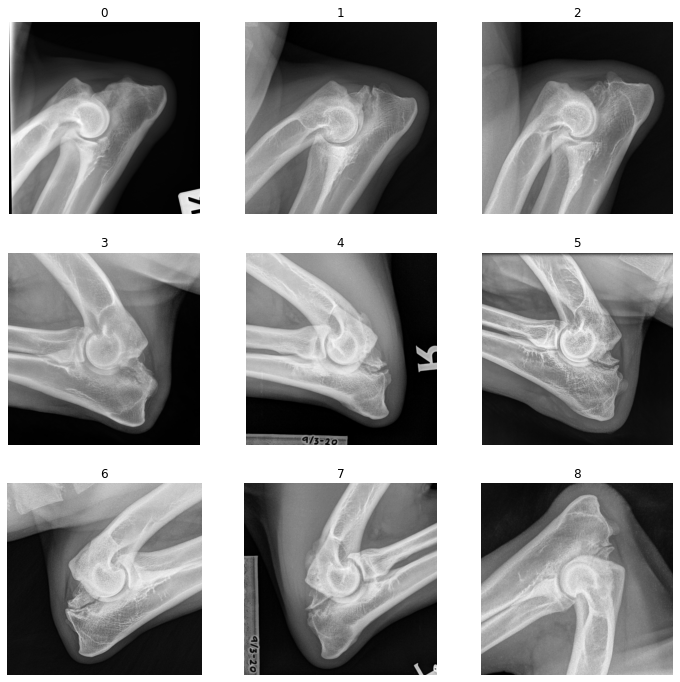

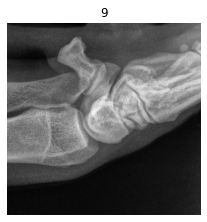

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [9]
detection_df[~detection_df.index.isin(remove_indice)]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.31933.1.20201105.120612.0.2.17326...,349,514,261,425,1.000000,20,3,"3, UAP"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20200430.152108.0.dcm,1532,1768,2141,2376,0.715096,20,3,"3, UAP"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20200810.125431.0.dcm,1346,1546,1657,1856,0.996722,20,3,"3, UAP"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.270715373.49516.16586.48126.421...,626,799,787,960,0.999999,20,3,"3, UAP"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.11074695881.63620.49732.36347.30724...,993,1235,1374,1614,0.899612,20,3,"3, UAP"
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.11817310703.13611.61248.43155.25135...,341,529,730,917,0.999997,20,3,"3, UAP"
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.12890324212.13898.19533.33144.30600...,1122,1358,1149,1388,0.995456,20,3,"3, UAP"
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.13926841881.62681.9806.43201.64097....,1365,1602,1317,1555,0.998391,20,3,"3, UAP"
8,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.1696703809.47281.44618.43749.51699....,1363,1599,2005,2241,0.965759,20,3,"3, UAP"


In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)